<a href="https://colab.research.google.com/github/ghulam2545/deep_learning/blob/main/cifar10_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# x_train = shuffle(x_train)
# x_test = shuffle(x_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
x_train_processed = x_train / 255.0
x_test_processed = x_test / 255.0

In [4]:
model = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [6]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(x_train_processed, y_train, batch_size=64, epochs=12, verbose=2)

Epoch 1/12
782/782 - 15s - loss: 1.5356 - accuracy: 0.4374 - 15s/epoch - 19ms/step
Epoch 2/12
782/782 - 3s - loss: 1.1213 - accuracy: 0.6020 - 3s/epoch - 4ms/step
Epoch 3/12
782/782 - 3s - loss: 0.9628 - accuracy: 0.6610 - 3s/epoch - 4ms/step
Epoch 4/12
782/782 - 4s - loss: 0.8449 - accuracy: 0.7050 - 4s/epoch - 5ms/step
Epoch 5/12
782/782 - 3s - loss: 0.7521 - accuracy: 0.7374 - 3s/epoch - 4ms/step
Epoch 6/12
782/782 - 3s - loss: 0.6864 - accuracy: 0.7617 - 3s/epoch - 4ms/step
Epoch 7/12
782/782 - 3s - loss: 0.6146 - accuracy: 0.7847 - 3s/epoch - 4ms/step
Epoch 8/12
782/782 - 3s - loss: 0.5527 - accuracy: 0.8052 - 3s/epoch - 4ms/step
Epoch 9/12
782/782 - 3s - loss: 0.5053 - accuracy: 0.8224 - 3s/epoch - 4ms/step
Epoch 10/12
782/782 - 3s - loss: 0.4407 - accuracy: 0.8447 - 3s/epoch - 4ms/step
Epoch 11/12
782/782 - 4s - loss: 0.3974 - accuracy: 0.8606 - 4s/epoch - 5ms/step
Epoch 12/12
782/782 - 3s - loss: 0.3479 - accuracy: 0.8781 - 3s/epoch - 4ms/step


In [8]:
model.evaluate(x_test_processed, y_test, batch_size=64)

157/157 [==============================] - 1s 3ms/step - loss: 0.9791 - accuracy: 0.7208


[0.9791356325149536, 0.72079998254776]

In [9]:
sample_images = x_test[:18]
sample_images_processed = sample_images.astype('float32') / 255.0

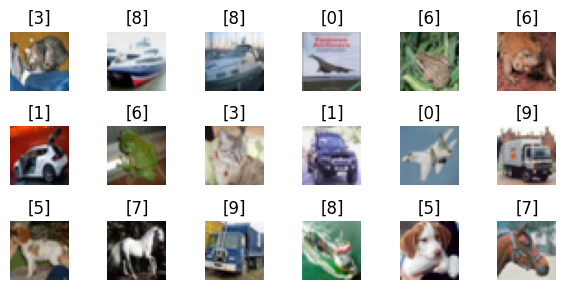

In [12]:
rows = 3
cols = 6
curr_fig = 1
plt.figure(figsize=(6, 3))
for i in range(rows):
  for j in range(cols):
    plt.subplot(rows, cols, curr_fig)
    plt.imshow(sample_images[curr_fig - 1])
    plt.title(y_test[curr_fig - 1])
    plt.axis('off')
    curr_fig += 1
plt.tight_layout()
plt.show()    

In [14]:
pred = model.predict(sample_images_processed)
for _  in pred:
  print(np.argmax(_), end=' ')

1/1 [==============================] - 0s 22ms/step
3 8 1 0 4 6 9 6 3 1 0 9 2 7 9 8 5 7 